Going to Mars
=====
#####Version 0.1
In this Tutorial we will explore a Mars mission of a chemically propelled spacecraft that can use a launcher delivering up to 4 km/s departure $\Delta V$. We will model this mission using an MGA-1DSM trajectory model. First we look at a direct transfer, then we will try to investigate how fly-bys change things.


### Import statments
***

Both PyGMO and PyKEP are imported in the main namespace, while matplotlib is imported as plt. This is our suggested mode to work with PyGMO and PyKEP as they do not contain many symbols, thus the root namesace does not get overflowed

In [4]:
import pygmo as pg
import pykep as pk
from matplotlib import pyplot as plt

### Direct Transfer
***

We start by looking into a direct transfer. A direct transfer is a trajectory that directly transfers the spacecarft from the Earth to Mars without 'visiting' other planets on its way. We define the *encounter sequence* as a list of planets. We use PyKEP planet_ss (ss stands for solar system) object for convenience as both Earth and Mars are already defined there. The ephemerides computations will then be performed using a simplified interpolated mode which is fairly accurate in the chosen timeframe.

In [5]:
seq = [pk.planet.jpl_lp('earth'), pk.planet.jpl_lp('mars')]

We then define the *launch window*, that is the allowed dates for the launch. This will be a list of two PyKEP epoch objects. We construct the epochs using the Modified Julian Date 2000, then print to screen the epochs so that we get to see the dates in a more readable format. We also define the *time of flight* as a list of upper and lower bounds on each leg duration (in this case we only have one leg) and the departure $v_\infty$ in km/sec

In [7]:
t0 = [epoch(4000), epoch(10000)]
tof = [[60, 380]]
vinf = [0,4]
print(t0)

[2010-Dec-14 00:00:00, 2027-May-19 00:00:00]


We may now construct a global optimization problem representing out Earth-Mars transfer as a multiple gravity assist interplanetary trajectory allowing one *Deep Space Manouvre*. Of course, in this first simple case no gravity assist are present.

In [27]:
prob = pk.trajopt.mga_1dsm(seq = seq, t0 = t0, tof = tof, vinf = vinf)

TypeError: plot() missing 1 required positional argument: 'x'

Let us have a look to a randomly generated solution.

In [32]:
pop = pg.population(prob, 1)
pop

Problem name: <class 'pykep.trajopt._mga_1dsm.mga_1dsm'>
	Global dimension:			6
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [4000, 0, 0, 0, 0.1, ... ]
	Upper bounds: [10000, 1, 1, 4000, 0.9, ... ]
	Has batch fitness evaluation: false

	Has gradient: false
	User implemented gradient sparsity: false
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 1

	Thread safety: none

Extra info:

	 Sequence: ['earth', 'mars']
	 Add launcher vinf to the objective?: False
	 Add final vinf to the objective?: True
Population size: 1

List of individuals: 
#0:
	ID:			14324047078253922968
	Decision vector:	[9278.63, 0.0296254, 0.648863, 2481.55, 0.339686, ... ]
	Fitness vector:		[123765]

Champion decision vector: [9278.63, 0.0296254, 0.648863, 2481.55, 0.339686, ... ]
Champion fitness: [123765]

In [40]:
print(prob.pretty(pop.champion_x))

First Leg: earth to mars
Departure: 2025-May-27 15:00:53.538008 (9278.625619652867 mjd2000) 
Duration: 96.45949619387044days
VINF: 2.481546987848147 km/sec
DSM after 32.765935636973936 days
DSM magnitude: 64689.16329880882m/s

Arrival at mars
Arrival epoch: 2025-Sep-01 02:02:34.009158 (9375.085115846738 mjd2000) 
Arrival Vinf: 59075.99994404271m/s
Total mission time: 0.2640917075807541 years (96.45949619387044 days)
None


TypeError: 'bool' object is not subscriptable

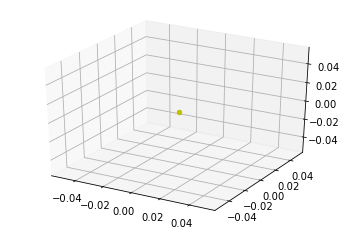

In [42]:
prob.plot(x = pop.champion_x)

And let us know *evolve* a good solution and inspect it 

In [45]:
algo = algorithm.cmaes(gen = 2500)
l = list()
for i in range(10):
    pop = population(prob,100)
    pop = algo.evolve(pop)
    print(pop.champion_f)
    l.append(pop.champion)
l = sorted(l, key =  lambda x: x.f[0])

AttributeError: type object 'pygmo.core.algorithm' has no attribute 'cmaes'

In [40]:
print prob.pretty(l[0].x)
prob.plot(l[0].x)
plt.show()

First Leg: earth to mars
Departure: 2024-Sep-20 10:22:43.784225 (9.029432451206307e+03 mjd2000)
Duration: 3.327753367191272e+02 days
VINF: 3.561063522238222e+00 km/sec
DSM after 2.308755346759484e+02 days
DSM magnitude: 2.136138099438201e+00 m/s

Arrival at mars
Arrival epoch: 2025-Aug-19 04:59:12.876757 (9.362207787925434e+03 mjd2000) 
Arrival Vinf: 2.415451536795122e+03m/s
Total mission time: 9.110892175746125e-01 years



### Using a fly-by sequence
***

We now study the possibility to get to Mars adding a few fly-bys before. We consider the case of an Earth-Venus-Earth-Mars sequence. In the case of a Mars mission this is not going to improve our direct transfer that only requires an arrival $\Delta V$ that could only be decreased by a free $\Delta$ in a point in between the Earth and Mars. Our fly-bys will add the possibility of having a free $\Delta V$ at the Earth and Venus positions. Thus we expect to be *at most* able to get a $\Delta$ V with a similar value as the direct transfer. We start defining the sequence:

In [8]:
seq = [planet_ss('earth'), planet_ss('venus'), planet_ss('earth'), planet_ss('mars')]

We then enlarge the launch window as to remove possible planetary bad-phasing problems:

In [22]:
t0 = [epoch(1000), epoch(10000)]
tof = [[1, 680],[1,600],[1,600]]

And we instantiate/inspect the new global optimization problem:

In [23]:
prob = problem.mga_1dsm_tof(seq=seq, t0 = t0, tof = tof, vinf = vinf)
print prob

Problem name: MGA-1DSM (tof-encoding)
	Global dimension:			14
	Integer dimension:			0
	Fitness dimension:			1
	Constraints dimension:			0
	Inequality constraints dimension:	0
	Lower bounds: [1000, 0, 0, 0, 1.0000000000000001e-05, 1, -6.2831853071795862, 1.1000000000000001, 1.0000000000000001e-05, 1, -6.2831853071795862, 1.1000000000000001, 1.0000000000000001e-05, 1]
	Upper bounds: [10000, 1, 1, 4000, 0.99999000000000005, 680, 6.2831853071795862, 100, 0.99999000000000005, 600, 6.2831853071795862, 100, 0.99999000000000005, 600]
	Constraints tolerance: []

	Sequence: earth venus earth mars 
	Add launcher vinf to the objective?:  False

	Add arrival vinf to the objective?:  True



We generate a random solution and inspect it.

In [24]:
pop = population(prob,1)
ax = prob.plot(pop.champion.x)
plt.show()
print prob.pretty(pop.champion.x)

First Leg: earth to venus
Departure: 2027-Jan-11 01:57:10.936710 (9.872081376582297e+03 mjd2000)
Duration: 3.032767768467365e+02 days
VINF: 7.571529969448392e-01 km/sec
DSM after 1.138947852550864e+02 days
DSM magnitude: 2.260138204381752e+04 m/s

leg no: 2: venus to earth
Duration: 3.419180836369978e+02 days
Fly-by epoch: 2027-Nov-10 08:35:44.456268 (1.017535815342903e+04 mjd2000) 
Fly-by radius: 9.057796724661786e+01 planetary radii
DSM after 2.491051181297873e+02 days
DSM magnitude: 2.250681053395309e+04m/s

leg no: 3: earth to mars
Duration: 5.404313385431311e+02 days
Fly-by epoch: 2028-Oct-17 06:37:46.882505 (1.051727623706603e+04 mjd2000) 
Fly-by radius: 2.877536933107061e+01 planetary radii
DSM after 1.714083277252185e+02 days
DSM magnitude: 5.052486027874133e+03m/s

Arrival at mars
Arrival epoch: 2030-Apr-10 16:58:54.532631 (1.105770757560916e+04 mjd2000) 
Arrival Vinf: 3.081299175855881e+03m/s
Total mission time: 3.246067622250145e+00 years



We then try to apply the same method we used before to solve this problem. This produces extremely bad results, is this because the problem does not admit good solutions? Or is it because we are failing to find them. Problem knowledge and intuition here come to our help as we have already argued how there should be a solution with a value close to the direct transfer one (e.g. 2700 m/s) ...... 

In [25]:
algo = algorithm.jde(gen = 500)
l = list()
for i in range(10):
    pop = population(prob,20)
    pop = algo.evolve(pop)
    print pop.champion.f
    l.append(pop.champion)

(8453.547475197316,)
(9490.45888802245,)
(6547.319843557206,)
(8289.747068003235,)
(8052.926083007214,)
(9351.880168089048,)
(8275.782071751917,)
(8477.156670516702,)
(8953.464361256694,)
(8662.765843838928,)


.... so we try to deploy a better solution technique (in this case island model)

In [26]:
l = list()
algo = algorithm.jde(gen = 200)
for i in range(10):
    archi = archipelago(algo,prob,8,20)
    archi.evolve(15)
    best_island = sorted(archi, key=lambda x: x.population.champion.f[0])[0]
    l.append(best_island.population.champion)
    print best_island.population.champion.f[0]
l = sorted(l, key =  lambda x: x.f[0])

5240.03072874
5901.94701984
6310.81213914
5565.13895235
6458.97980764
5794.64392231
5232.20519373
5905.92094852
5691.85917068
4718.51337834


Things have improved, but are still far from what we expect .... we thus inspect the best found trajectory

In [27]:
print prob.pretty(l[0].x)

First Leg: earth to venus
Departure: 2023-Feb-26 01:07:47.484082 (8.457047077362062e+03 mjd2000)
Duration: 2.159364502390903e+02 days
VINF: 3.911115332990846e+00 km/sec
DSM after 4.163826895261372e+01 days
DSM magnitude: 9.988253894207539e+02 m/s

leg no: 2: venus to earth
Duration: 3.004838777034002e+02 days
Fly-by epoch: 2023-Sep-29 23:36:16.784740 (8.672983527601153e+03 mjd2000) 
Fly-by radius: 9.683079424915841e+00 planetary radii
DSM after 9.465543435092810e+01 days
DSM magnitude: 9.738051892225533e+02m/s

leg no: 3: earth to mars
Duration: 3.354808740432044e+02 days
Fly-by epoch: 2024-Jul-26 11:13:03.818313 (8.973467405304553e+03 mjd2000) 
Fly-by radius: 4.937323948842165e+00 planetary radii
DSM after 6.607070682645072e+01 days
DSM magnitude: 8.542225034084930e+01m/s

Arrival at mars
Arrival epoch: 2025-Jun-26 22:45:31.335646 (9.308948279347756e+03 mjd2000) 
Arrival Vinf: 2.660460549359369e+03m/s
Total mission time: 2.332378376415318e+00 years



And we run again the optimization restricting the search space around this solution (i.e. having a launch date around 8500 MJD2000, you may have a different solution to the one we obtained, in which case explore that launch window instead)

In [15]:
t0 = [epoch(8400), epoch(8800)]
tof = [[1, 300],[1,400],[1,400]]
prob = problem.mga_1dsm_tof(seq=seq, t0 = t0, tof = tof, vinf = vinf)
l = list()
algo = algorithm.jde(gen = 200)
for i in range(10):
    archi = archipelago(algo,prob,8,20)
    archi.evolve(15)
    best_island = sorted(archi, key=lambda x: x.population.champion.f[0])[0]
    l.append(best_island.population.champion)
    print best_island.population.champion.f[0]
l = sorted(l, key =  lambda x: x.f[0])

2877.64868378
2901.13187256
2875.83115394
2874.6387355
2876.60406836
2929.29816465
2881.95827612
2877.6079692
2875.7684513
2876.19107968


Much better ... with respect to the 2704 m/s $\Delta V$ that we were expecting we are sufficiently close. The difference (170 m/s) can now be explained as a difference in the arrival date (e.g. in order to find Earth and Venus phased correctly and thus allow the fly-by mission, the Mars arrival conditions have changed for worse). We inspect the solution seeing how it does not make use of deep space manouvres.

In [16]:
ax = prob.plot(l[0].x)
plt.show()
print prob.pretty(l[0].x)

First Leg: earth to venus
Departure: 2023-Mar-26 01:00:41.152027 (8.485042142963275e+03 mjd2000)
Duration: 1.904545053472411e+02 days
VINF: 3.997575495571410e+00 km/sec
DSM after 5.074001021125163e+01 days
DSM magnitude: 3.996852717477555e-02 m/s

leg no: 2: venus to earth
Duration: 2.787609387282590e+02 days
Fly-by epoch: 2023-Oct-02 11:55:10.414029 (8.675496648310516e+03 mjd2000) 
Fly-by radius: 5.143331598736910e+00 planetary radii
DSM after 1.657238914891040e+01 days
DSM magnitude: 5.143170590255228e-02m/s

leg no: 3: earth to mars
Duration: 3.248014995768976e+02 days
Fly-by epoch: 2024-Jul-07 06:10:55.520150 (8.954257587038775e+03 mjd2000) 
Fly-by radius: 3.676532257750312e+00 planetary radii
DSM after 1.864251994616333e+01 days
DSM magnitude: 1.485124464150173e-02m/s

Arrival at mars
Arrival epoch: 2025-May-28 01:25:05.083594 (9.279059086615673e+03 mjd2000) 
Arrival Vinf: 2.874532484022688e+03m/s
Total mission time: 2.173899914174942e+00 years

